In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("../Data/train.csv")

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.")

There are 4088 rows and 13 columns in dataset.


In [6]:
df=df.drop(["Unnamed: 0", "id"], axis=1)

In [9]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.")

There are 4088 rows and 11 columns in dataset.


In [10]:
# check for missing values in the dataset
df.isnull().sum().any()

True

In [13]:
missing_values = df.isnull().sum().sum()

In [36]:
percentage_missing = (missing_values/len(df))*100

In [38]:
print(f"There are {percentage_missing:.2f}% values missing in dataset.")

There are 3.82% values missing in dataset.


In [39]:
# drop the rows containing missing values
df=df.dropna(axis=0,)

In [40]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked,0
1,Female,62.0,0,0,Yes,Private,Urban,88.32,36.3,Unknown,0
2,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked,0
3,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked,0
4,Female,31.0,0,0,No,Private,Rural,59.63,19.9,never smoked,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3932 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3932 non-null   object 
 1   age                3932 non-null   float64
 2   hypertension       3932 non-null   int64  
 3   heart_disease      3932 non-null   int64  
 4   ever_married       3932 non-null   object 
 5   work_type          3932 non-null   object 
 6   Residence_type     3932 non-null   object 
 7   avg_glucose_level  3932 non-null   float64
 8   bmi                3932 non-null   float64
 9   smoking_status     3932 non-null   object 
 10  stroke             3932 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 368.6+ KB


In [54]:
# select categorical features
categorical_features = df.select_dtypes(include=["int64", "object"]).columns.to_list()

In [55]:
# select numerical features
numerical_features = [feature for feature in df.columns if feature not in categorical_features]

In [87]:
# create a helper function for plotting data
def plot_categorical_data(feat_1, feat_2):
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.countplot(x=feat_1, data=df)
    plt.subplot(122)
    sns.countplot(x=feat_2, data=df)
    plt.show()
# TODO : Plot categoric features
def categorical_plotter():
    x=0
    y=1
    for _ in range(int(len(categorical_features)/2)):
        plot_categorical_data(categorical_features[x], categorical_features[y])
        x+=2
        y+=2

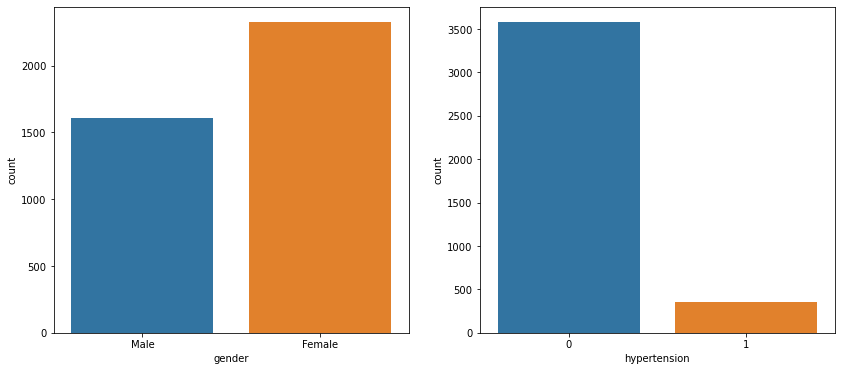

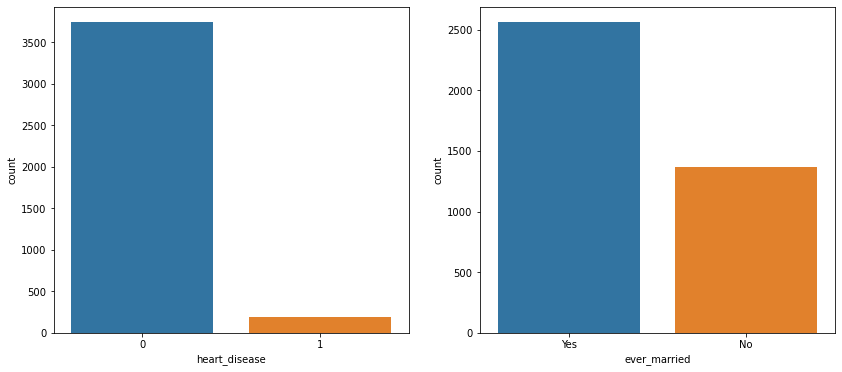

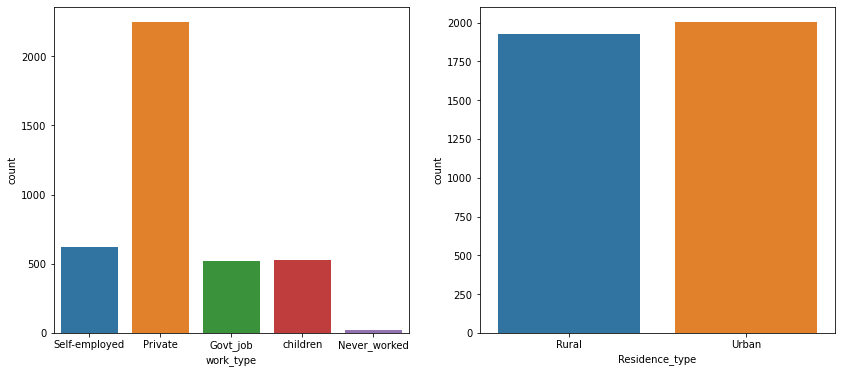

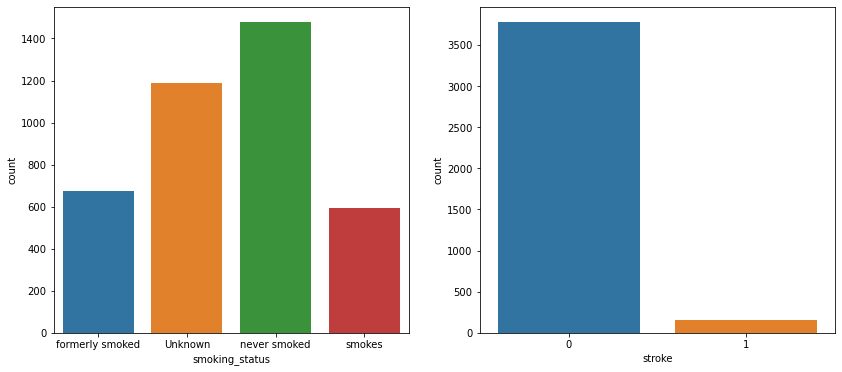

In [88]:
categorical_plotter()

In [139]:
# create a helper function for plotting data
def plot_categorical_data(feat_1, feat_2):
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    sns.countplot(x=feat_1, data=df, hue="stroke")
    plt.subplot(122)
    sns.countplot(x=feat_2, data=df, hue="stroke")
    plt.show()
# TODO : Plot categoric features w.r.t. target
def categorical_plotter():
    x=0
    y=1
    for _ in range(int(len(categorical_features)/2)):
        plot_categorical_data(categorical_features[x], categorical_features[y])
        x+=2
        y+=2

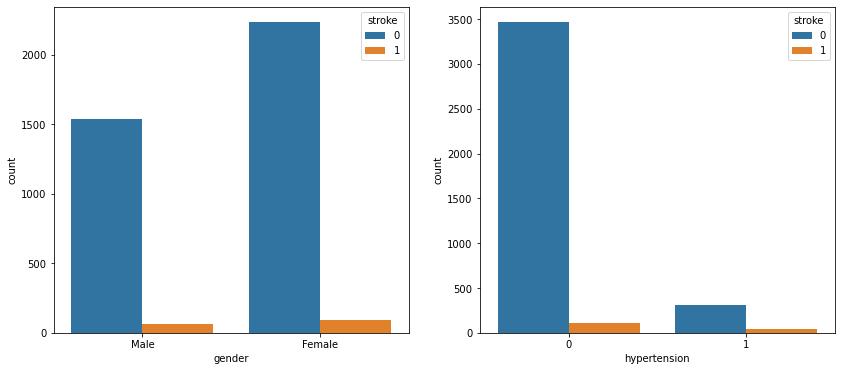

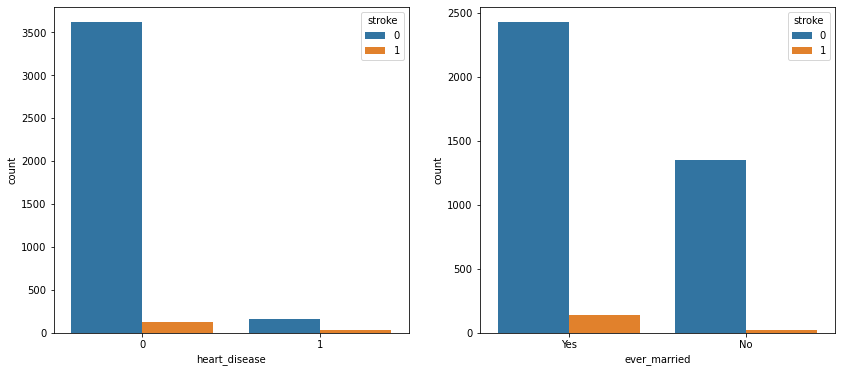

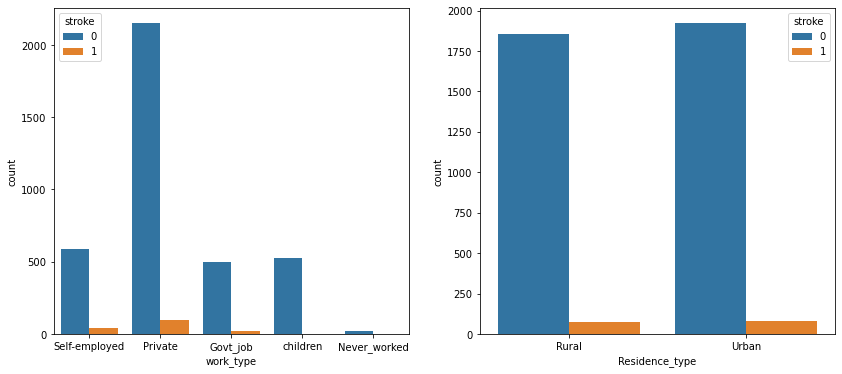

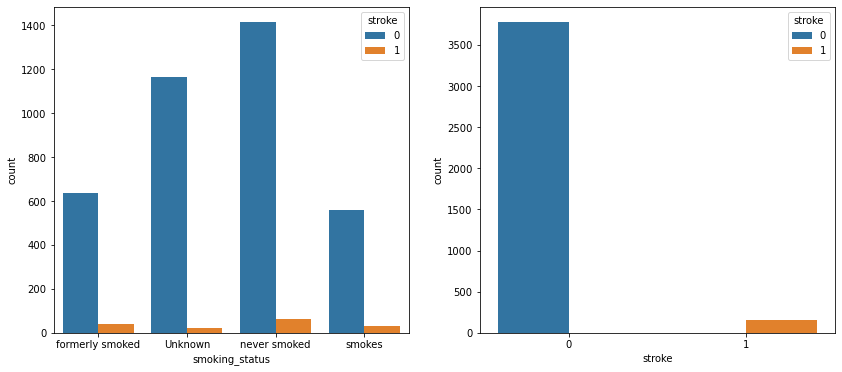

In [140]:
categorical_plotter()

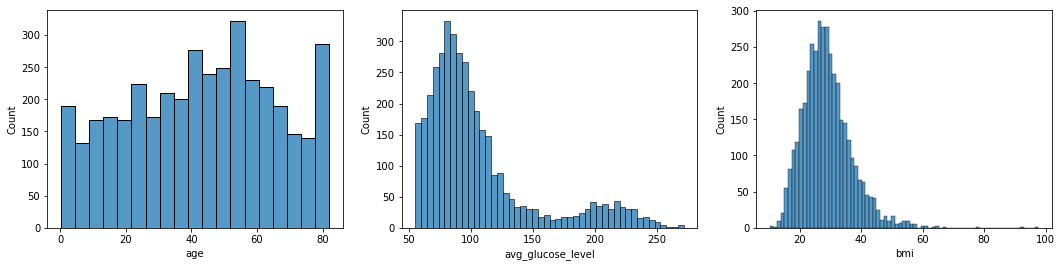

In [110]:
# TODO: plot the numerical features
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
for i in range(len(numerical_features)):
    sns.histplot(x=numerical_features[i], data=df, ax=ax[i])
plt.plot()
plt.show()

In [115]:
# TODO: Check correlationships amongst features and target
df.corr()["stroke"].sort_values(ascending=False)[1:]

age                  0.224525
heart_disease        0.135186
hypertension         0.131694
avg_glucose_level    0.128996
bmi                  0.042465
Name: stroke, dtype: float64

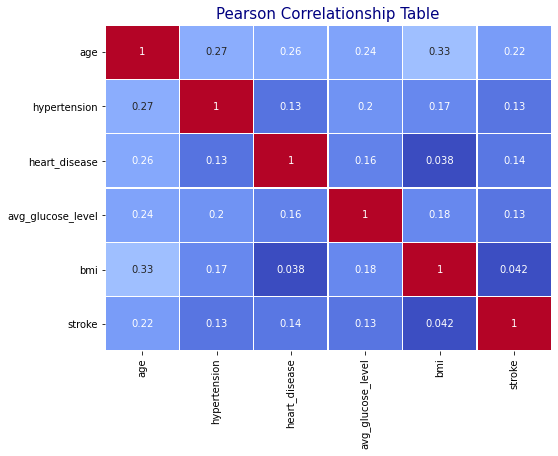

In [136]:
# TODO: Plot the correlationships
font_dict =  {'fontsize': 15, 'fontweight': 5, 'color': "navy"}
plt.figure(figsize=(8,6))
plt.title(label="Pearson Correlationship Table", fontdict=font_dict)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", cbar=False, linewidth=0.5)
plt.show()

In [138]:
# Save the cleaned data
df.to_csv("../Data/train.csv", index=False)